In [ ]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 7.7 MB/s 


In [ ]:
import pyupbit

In [ ]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df

,open,high,low,close,volume,value
2021-11-28 12:00:00,69649000.0,69789000.0,69141000.0,69172000.0,235.786621,1.637121e+10
2021-11-28 13:00:00,69172000.0,69195000.0,68630000.0,68794000.0,363.754363,2.507321e+10
2021-11-28 14:00:00,68713000.0,69382000.0,68607000.0,69287000.0,249.096711,1.719862e+10
2021-11-28 15:00:00,69287000.0,69700000.0,69257000.0,69544000.0,184.608534,1.280943e+10
2021-11-28 16:00:00,69545000.0,69988000.0,69416000.0,69735000.0,200.719219,1.399355e+10
...,...,...,...,...,...,...
2021-12-06 15:00:00,60722000.0,60948000.0,60000000.0,60113000.0,519.712405,3.138226e+10
2021-12-06 16:00:00,60113000.0,60330000.0,59016000.0,60318000.0,1007.336155,6.017846e+10
2021-12-06 17:00:00,60330000.0,61294000.0,59800000.0,59971000.0,738.751379,4.464238e+10
2021-12-06 18:00:00,59971000.0,60118000.0,59092000.0,59228000.0,583.337953,3.472180e+10


In [ ]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-11-28 12:00:00,69172000.0
1,2021-11-28 13:00:00,68794000.0
2,2021-11-28 14:00:00,69287000.0
3,2021-11-28 15:00:00,69544000.0
4,2021-11-28 16:00:00,69735000.0
...,...,...
195,2021-12-06 15:00:00,60113000.0
196,2021-12-06 16:00:00,60318000.0
197,2021-12-06 17:00:00,59971000.0
198,2021-12-06 18:00:00,59228000.0


In [ ]:
#prophet 불러옴
from fbprophet import Prophet

In [ ]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [ ]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

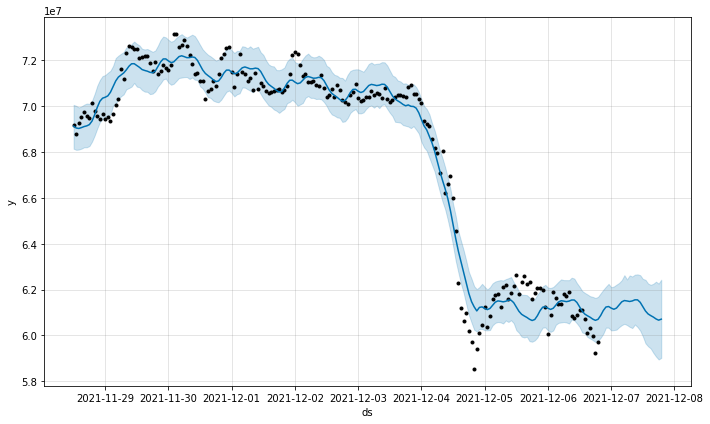

In [ ]:
#그래프1
fig1 = model.plot(forecast)

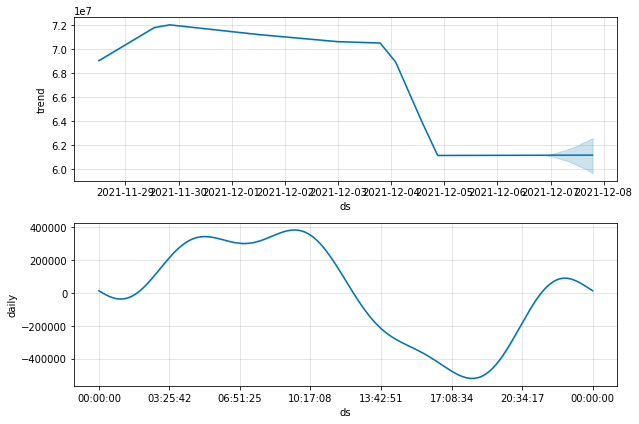

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

In [ ]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

59727000.0

In [ ]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

61555696.86472948

In [ ]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  59727000.0
종가의 가격:  61555696.86472948


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-28 12:00:00,6.905586e+07,6.814630e+07,7.005997e+07,6.905586e+07,6.905586e+07,73729.353165,73729.353165,73729.353165,73729.353165,73729.353165,73729.353165,0.0,0.0,0.0,6.912959e+07
1,2021-11-28 13:00:00,6.916612e+07,6.809741e+07,7.001459e+07,6.916612e+07,6.916612e+07,-117006.179771,-117006.179771,-117006.179771,-117006.179771,-117006.179771,-117006.179771,0.0,0.0,0.0,6.904911e+07
2,2021-11-28 14:00:00,6.927637e+07,6.811040e+07,6.994633e+07,6.927637e+07,6.927637e+07,-246466.645488,-246466.645488,-246466.645488,-246466.645488,-246466.645488,-246466.645488,0.0,0.0,0.0,6.902991e+07
3,2021-11-28 15:00:00,6.938663e+07,6.815030e+07,6.999455e+07,6.938663e+07,6.938663e+07,-318982.864242,-318982.864242,-318982.864242,-318982.864242,-318982.864242,-318982.864242,0.0,0.0,0.0,6.906765e+07
4,2021-11-28 16:00:00,6.949688e+07,6.820835e+07,7.006543e+07,6.949688e+07,6.949688e+07,-383666.659474,-383666.659474,-383666.659474,-383666.659474,-383666.659474,-383666.659474,0.0,0.0,0.0,6.911322e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-12-07 15:00:00,6.118625e+07,5.943267e+07,6.220899e+07,6.009992e+07,6.226233e+07,-318982.864240,-318982.864240,-318982.864240,-318982.864240,-318982.864240,-318982.864240,0.0,0.0,0.0,6.086727e+07
220,2021-12-07 16:00:00,6.118656e+07,5.924336e+07,6.225614e+07,6.002704e+07,6.231242e+07,-383666.659473,-383666.659473,-383666.659473,-383666.659473,-383666.659473,-383666.659473,0.0,0.0,0.0,6.080289e+07
221,2021-12-07 17:00:00,6.118687e+07,5.908313e+07,6.234730e+07,5.991425e+07,6.241200e+07,-464356.694194,-464356.694194,-464356.694194,-464356.694194,-464356.694194,-464356.694194,0.0,0.0,0.0,6.072251e+07
222,2021-12-07 18:00:00,6.118718e+07,5.895302e+07,6.226384e+07,5.980589e+07,6.251833e+07,-518863.367171,-518863.367171,-518863.367171,-518863.367171,-518863.367171,-518863.367171,0.0,0.0,0.0,6.066832e+07
